# Notebook to build a network generator module

In [28]:
%load_ext blackcellmagic
%load_ext autoreload

%matplotlib inline
%autoreload 2

import pyphi
from units import network_builder as nb
import matplotlib.pyplot as plt
import numpy as np

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example units that are default logic gates

In [2]:
xor_unit = nb.Unit(
    index=0,
    label="A",
    inputs=(1,2),
    params=dict(mechanism="xor",params={'floor': 0.01, 'ceiling': 0.95}),
    state=(0,),
    input_state=(0, 1)
)

In [3]:
xor_unit.params

{'mechanism': 'xor', 'params': {'floor': 0.01, 'ceiling': 0.95}}

In [4]:
xor_unit.tpm

array([[0.01, 0.95],
       [0.95, 0.01]])

In [5]:
xor_unit.inputs

(1, 2)

In [ ]:
xor_unit.

## An example unit composed of two distinct mechanisms


In [8]:
determinism = 4
threshold = 0.5
floor = 0.2
ceiling = 0.95

In [9]:
# The unit mechanisms
grid_unit = dict(
    mechanism="sigmoid",
    params=dict(
        input_weights=[0.1, 0.9, 0.1],
        determinism=determinism,
        threshold=threshold,
        floor=floor,
        ceiling=ceiling,
    ),
)

mismatch_corrector = dict(
    mechanism="mismatch_corrector",
    params=dict(
        floor=floor,
        ceiling=ceiling,
    ),
)

In [10]:
# The definition for how the unit as one responds given the response of the individual mechanisms
mechanism_combination = dict(
    mechanism="biased_sigmoid",
    params=dict(
        input_weights=[0.4, 4.],
        determinism=4,
        threshold=0.5,
        floor=floor,
        ceiling=ceiling,
    ),
)

In [11]:
params = dict(
    index=0,
    label="A_w",
    inputs=[(6, 7, 9), (2,)],
    params=[grid_unit, mismatch_corrector],
    mechanism_combination=mechanism_combination,
    state=(1,),
    input_state=[(0, 1, 0), (0,)]
)

In [12]:
a = nb.CompositeUnit(**params)

In [13]:
a

CompositeUnit(type=['sigmoid', 'mismatch_corrector'], label=A_w, state=(1,))

In [14]:
a.tpm[(1,0,0,0)]

array([0.46217571])

In [16]:
a.tpm

array([[[[[0.46018863],
          [0.46018863]],

         [[0.46217571],
          [0.46217571]]],


        [[[0.48922631],
          [0.48922631]],

         [[0.49121338],
          [0.49121338]]]],



       [[[[0.46217571],
          [0.46217571]],

         [[0.46476222],
          [0.46476222]]],


        [[[0.49121338],
          [0.49121338]],

         [[0.49268113],
          [0.49268113]]]]])

# Create the Wiki substrate

### First, define the basic building blocks of the units

In [18]:
floor = 0.01
ceiling = 0.99
selectivity = 10
determinism=15
threshold=0.3

# simple self loop
self_loop = dict(
    mechanism="sigmoid",
    params=dict(
        input_weights=[0.9],
        determinism=determinism,
        threshold=threshold,
        floor=floor,
        ceiling=ceiling,
    ),
)

# modulated self loop
modulated_self_loop = dict(
    mechanism="biased_sigmoid",
    params=dict(
        input_weights=[0.9, 1.5],
        determinism=determinism,
        threshold=threshold,
        floor=floor,
        ceiling=ceiling,
    ),
)

# a mismatch corrector
mismatch_corrector = dict(
    mechanism="mismatch_corrector",
    params=dict(
        floor=0.2,
        ceiling=0.8,
    ),
)

# a grid unit, with modulation
grid_unit = dict(
    mechanism="modulated_sigmoid",
    params=dict(
        input_weights=[-0.1, 1.2, -0.1, 0.5],
        determinism=determinism,
        threshold=threshold,
        floor=floor,
        ceiling=ceiling,
    ),
)

# a sor gate "dot" detector
open_sor = dict(
    mechanism="sor",
    params=dict(
        pattern_selection=[s for s in pyphi.utils.all_states(3) if sum(s)>0],
        selectivity=selectivity,
        floor=floor,
        ceiling=ceiling,
    ),
)



### Define logic for how unit components are combined

In [28]:
input_combination = dict(
    mechanism="and",
    params=dict(
        floor=floor,
        ceiling=ceiling,
    ),
)
'''input_combination = dict(
    mechanism="weighted_mean",
    params=dict(
        weights=[0.8, 0.2],
        floor=floor,
        ceiling=ceiling,
    ),
)'''

#input_combination=None

'input_combination = dict(\n    mechanism="weighted_mean",\n    params=dict(\n        weights=[0.8, 0.2],\n        floor=floor,\n        ceiling=ceiling,\n    ),\n)'

### Define the particular units

In [29]:
# 3 input units representing distinct sensory modalities
I1 = dict(
    index=0,
    label="I1",
    inputs=[(0, 3)],
    params=[modulated_self_loop],
    mechanism_combination=None,
    state=(0,),
    input_state=[(0, 0,)]
)
I2 = dict(
    index=1,
    label="I2",
    inputs=[(1, 4)],
    params=[modulated_self_loop],
    mechanism_combination=None,
    state=(0,),
    input_state=[(0, 0,)]
)
I3 = dict(
    index=2,
    label="I3",
    inputs=[(2, 5)],
    params=[modulated_self_loop],
    mechanism_combination=None,
    state=(0,),
    input_state=[(0, 0,)]
)

# 3 units representing sensory cortices
A = dict(
        index=3,
        label="A",
        inputs=[(4, 3, 5, 6), (0,)],
        params=[grid_unit, mismatch_corrector],
        mechanism_combination=input_combination,
        state=(0,),
        input_state=[(0,0,0,0), (0,)]
    )
B = dict(
        index=4,
        label="B",
        inputs=[(3, 4, 5, 6), (1,)],
        params=[grid_unit, mismatch_corrector],
        mechanism_combination=input_combination,
        state=(0,),
        input_state=[(0,0,0,0), (0,)]
    )
B = dict(
        index=4,
        label="B",
        inputs=[(3, 4, 5, 6)],
        params=[grid_unit],
        mechanism_combination=input_combination,
        state=(0,),
        input_state=[(0,0,0,0)]
    )
C = dict(
        index=5,
        label="C",
        inputs=[(4, 5, 3, 6), (2,)],
        params=[grid_unit, mismatch_corrector],
        mechanism_combination=input_combination,
        state=(0,),
        input_state=[(0,0,0,0), (0,)]
    )

# SOR gate
D = dict(
        index=6,
        label="D",
        inputs=[(3,4,5), (6,7)],
        params=[open_sor, modulated_self_loop],
        mechanism_combination=input_combination,
        state=(0,),
        input_state=[(0,0,0), (0,0)]
    )

# Output
O = dict(
        index=7,
        label="O",
        inputs=[(6,), (7,)],
        params=[mismatch_corrector, self_loop],
        mechanism_combination=input_combination,
        state=(0,),
        input_state=[(0,), (0,)]
    )


### Creating units and substrate

In [30]:
units = [I1, I2, I3, A, B, C, D, O]
wiki_units = [nb.CompositeUnit(**params).Unit for params in units]

No combination defined, using OR-logic
No combination defined, using OR-logic
No combination defined, using OR-logic


In [31]:
substrate_state = (0,1,0,0,1,0,1,1)
substrate = nb.Substrate(wiki_units)
substrate

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [00:01<00:00, 141.88it/s]


Substrate(I1|I2|I3|A|B|C|D|O)

In [32]:
substrate.units[substrate_state][0].__repr__()

"Unit(type=Composite unit: ['biased_sigmoid'], label=I1, state=(0,))"

0.016038474798350695


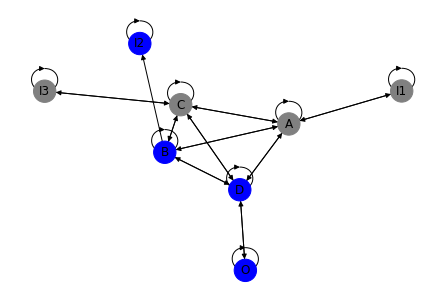

In [33]:
state = (0,1,0,0,1,0,1,1)
print(substrate.tpm[(state)][3])
substrate.plot_model(state)

In [44]:
import string

# create functionality to create units (and substrate) from weight matrix

In [72]:
nb.Build.units_from_weights(weights, unit_types, unit_params)

NameError: name 'standard_labels' is not defined

In [69]:
# define weight matrix
s = 0.3
l = 0.35
weights = np.array([
    [s, l, 0, l],
    [l, s, l, 0],
    [0, l, s, l],
    [l, 0, l, s]
])

# set unit types
unit_types = ['resonnator']*len(weights)

# define unit parameters
unit_params = [
    dict(
        input_weights=None,
        determinism=1,
        threshold=0.0,
        floor=0.01,
        ceiling=0.99,
        weight_scale_mapping={(0, 0): 1.0, (1, 0): 0.5, (0, 1): 0.75, (1, 1): 1.5},
)]*len(weights)

#create units
units = units_from_weights(weights, unit_types, unit_params, labels=None, indices=None)

# create substrate
substrate = nb.Substrate(units)

# get subsystem
nodes = (1,2,3)
state = (0,)*len(substrate)
subsystem = substrate.get_subsystem(state,nodes)

In [70]:
subsystem

Subsystem(B, C, D)

In [40]:
units_from_weights(weights, unit_types, unit_params=None)

(0, 1, 3)
(0.3, 0.35, 0.35)
(0, 1, 2)
(0.35, 0.3, 0.35)
(1, 2, 3)
(0.35, 0.3, 0.35)
(0, 2, 3)
(0.35, 0.35, 0.3)


In [6]:


params = [
    dict(
        input_weights=None
        determinism=1,
        threshold=0.0,
        floor=0.01,
        ceiling=0.99,
        weight_scale_mapping={(0, 0): 1.0, (1, 0): 0.5, (0, 1): 0.75, (1, 1): 1.5},
)]*N



In [9]:
# parameters for sigmoidal subunit
V1_determinism = 1
V1_threshold = 0.0
V1_floor = 0.01
V1_ceiling = 0.99
V1_weight_scale_mapping = {
    (0, 0): 1.0,
    (1, 0): 0.5,
    (0, 1): 0.75,
    (1, 1): 1.5
}

self_loop = 0.30
lateral = 0.35
V1_weights = [
    lateral,  # near neighbor
    self_loop,  # self
    lateral,  # near neighbor
]

V1_sigmoid = 


In [15]:
index = 1
label = "B"
inputs = (0,1,2)



In [43]:

V1_sigmoid = dict(
    mechanism="resonnator",  #
    params=dict(
        input_weights=V1_weights,
        determinism=V1_determinism,
        threshold=V1_threshold,
        weight_scale_mapping=V1_weight_scale_mapping,
        floor=V1_floor,
        ceiling=V1_ceiling,
    ),
)

# parameters for mismatch detector subunit# parameters for sigmoidal subunit
V1_mm_floor = 0.01
V1_mm_ceiling = 0.99
V1_input = dict(
    mechanism="mismatch_corrector",
    params=dict(
        floor=V1_mm_floor,
        ceiling=V1_mm_ceiling,
    ),
)


In [44]:

# combine the mechanisms into composite units
substrate_state = (0,)*N
V1_sigmoid_inputs = (15,8,9,10,11,12,13,14,15,8)
# feedback amplification
feedback = (N-1,)

V1 = [
    nb.CompositeUnit(
        index=M + i,
        label=labels[M + i],
        inputs=[V1_sigmoid_inputs[i : i + 3] + feedback, (i,)],  #
        params=[V1_sigmoid, V1_input],  # FB_sigmoid
        substrate_state=substrate_state,
        substrate_indices=tuple(range(N)),
        mechanism_combination="selective",
        modulation=[None, None],  # None
        all_tpm=True
    ).Unit
    for i in range(len(layer_1))
] 

Unit A missing bias params, defaulting to 0.0


In [34]:

print(substrate.tpm[(state)][3])

0.016038474798350695


In [35]:

print(substrate.tpm[(state)][4])

0.9901999992716967


In [27]:
wiki_units[4].get_substate(wiki_units[4].inputs)

(0, 0, 0, 0)

In [38]:
wiki_units[4].substrate_state

(0, 0, 0, 0, 0, 0, 0)

In [36]:
wiki_units[4].tpm[]


array([0.02012747])

In [110]:
def evaluate_system_partition(subsystem, sys_effect_state, sys_cause_state, partition):
    n_nodes = len(subsystem)
    all_nodes = subsystem.node_indices

    if len(partition) == 1:
        cut = pyphi.partition.complete_partition(tuple(all_nodes), tuple(all_nodes))
        max_cut_info = n_nodes * n_nodes
    else:
        cut = pyphi.partition.KPartition(
            *[pyphi.partition.Part(tuple(part), tuple(part)) for part in partition]
        )
        max_cut_info = sum([len(part) * (n_nodes - len(part)) for part in partition])

    effect_info, _ = subsystem.evaluate_partition(
        pyphi.direction.Direction.EFFECT,
        mechanism=all_nodes,
        purview=all_nodes,
        partition=cut,
        state=sys_effect_state,
    )
    cause_info, _ = subsystem.evaluate_partition(
        pyphi.direction.Direction.CAUSE,
        mechanism=all_nodes,
        purview=all_nodes,
        partition=cut,
        state=sys_cause_state,
    )

    cut_info = min(effect_info, cause_info)

    return cut_info, cut_info / max_cut_info


def min_vertical_cut(subsystem, normalization=False):
    n_nodes = len(subsystem)
    all_nodes = subsystem.node_indices
    
    sys_effect_state = subsystem.find_maximal_state_under_complete_partition(
        pyphi.direction.Direction.EFFECT,
        mechanism=all_nodes,
        purview=all_nodes,
    )[0]

    sys_cause_state = subsystem.find_maximal_state_under_complete_partition(
        pyphi.direction.Direction.CAUSE,
        mechanism=all_nodes,
        purview=all_nodes,
    )[0]
    min_ii = n_nodes * n_nodes
    min_cut = None
    min_normalized_ii = 1.0

    for partition in pyphi.partition.partitions(all_nodes):
        cut_info, normalized_cut_info = evaluate_system_partition(
            subsystem, sys_effect_state, sys_cause_state, partition
        )

        if normalization:
            if normalized_cut_info <= min_normalized_ii:
                min_ii = cut_info
                min_cut = partition
                min_normalized_ii = normalized_cut_info
        else:
            if cut_info <= min_ii:
                min_ii = cut_info
                min_cut = partition
                min_normalized_ii = min_ii

    return min_ii, min_cut, sys_effect_state, sys_cause_state

In [115]:
from tqdm import tqdm 
all_ii = {
    nodes: min_vertical_cut(substrate.get_subsystem(state, nodes), normalization=False)
    for nodes in tqdm(list(pyphi.utils.powerset(substrate.node_indices, nonempty=True)))
}


100%|█████████████████████████████████████████████████████████████████████████████████| 255/255 [00:03<00:00, 66.87it/s]


In [116]:
sorted_ii = dict(sorted(all_ii.items(), key=lambda item: item[1][0], reverse=True))

In [117]:
sorted_ii[(3,4,5,6)]

(0.0023381424096, [[3, 4, 5], [6]], (0, 0, 0, 0), (1, 1, 1, 0))

In [118]:
sorted_ii

{(6, 7): (0.4528401774841, [[6], [7]], (0, 1), (1, 0)),
 (0,): (0.4257587637477, [[0]], (0,), (0,)),
 (2,): (0.4257587637477, [[2]], (0,), (0,)),
 (1,): (0.4206146326481, [[1]], (1,), (1,)),
 (3, 4): (0.3933625850598, [[3], [4]], (0, 0), (1, 0)),
 (3, 5): (0.313915666282, [[3], [5]], (0, 0), (0, 0)),
 (3,): (0.2659788792368, [[3]], (0,), (0,)),
 (5,): (0.1997138190024, [[5]], (0,), (0,)),
 (4, 5): (0.184446880631, [[4], [5]], (0, 0), (0, 1)),
 (1, 4): (0.1576163684811, [[1], [4]], (1, 0), (1, 1)),
 (1, 3, 4): (0.1261094832399, [[1], [3, 4]], (1, 0, 0), (1, 1, 1)),
 (2, 5): (0.1248159777176, [[2], [5]], (0, 0), (0, 0)),
 (2, 4, 5): (0.0892686236237, [[2], [4, 5]], (0, 0, 0), (0, 0, 1)),
 (0, 3, 4): (0.0794794011649, [[0], [3, 4]], (0, 0, 0), (0, 1, 0)),
 (0, 1, 3, 4): (0.0782678477069, [[0], [1, 3, 4]], (0, 1, 0, 0), (0, 1, 1, 1)),
 (0, 3): (0.0702430880128, [[0], [3]], (0, 0), (0, 0)),
 (2, 3, 5): (0.0691544567285, [[2], [3, 5]], (0, 0, 0), (0, 0, 0)),
 (3, 4, 5): (0.0562394336323, [[3

In [38]:
sys_effect_state

(0, 0, 0, 0)

In [29]:
%debug

> /Volumes/scratch/wmayner/projects/matching/data/pyphi/pyphi/subsystem.py(357)_single_node_effect_repertoire()
    355     def _single_node_effect_repertoire(self, mechanism, purview_node_index):
    356         # pylint: disable=missing-docstring
--> 357         purview_node = self._index2node[purview_node_index]
    358         # Condition on the state of the inputs that are in the mechanism.
    359         mechanism_inputs = purview_node.inputs & mechanism



ipdb>  self._index2node


{3: A, 4: B, 5: C, 6: D}


ipdb>  n


In [138]:
substrates = {
    substrate_state: nb.Substrate(wiki_units, substrate_state)
    for substrate_state in pyphi.utils.all_states(len(units))
}

combining unit tpms: 100%|█████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 14729.78it/s]


In [140]:
substrates[(0,)*8]

Substrate(I1|I2|I3|A|B|C|D|O in state 00000000)

In [141]:
import numpy as np
def simulate_substrates(substrates,initial_state,timesteps):
    
    rng = np.random.default_rng(0)
    states = [initial_state]
    
    for t in range(timesteps):
        P_next = substrates[states[-1]].tpm[states[-1]]
        comparison = rng.random(len(initial_state))
        
        states.append(tuple([1 if P>c else 0 for P,c in zip(P_next, comparison)]))
    
    return states
    

In [142]:
states = simulate_substrates(substrates,(0,)*8,100)

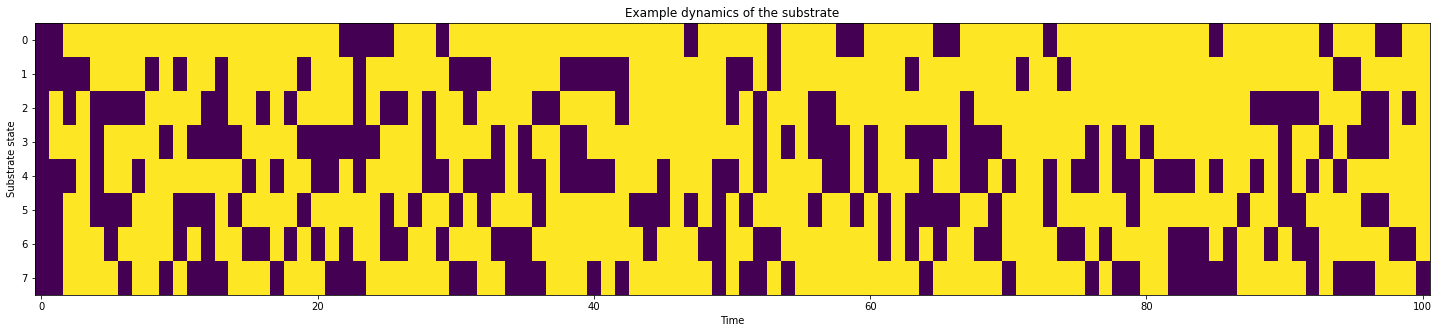

In [143]:
state_array = np.array([list(s) for s in states])
plt.figure(figsize=(25,5))
plt.imshow(state_array.T,aspect='auto',interpolation= 'none')
plt.title('Example dynamics of the substrate')
plt.ylabel('Substrate state')
plt.xlabel('Time')
plt.show()

## Unfold example substrates

In [144]:
state1 = (0,1,0,0,1,0,1,1) #single input on 
system_nodes = (3,4,5,6)

In [145]:
network = substrates[state1].get_network()
subsystem = pyphi.subsystem.Subsystem(network,state1,nodes=system_nodes)

In [146]:
distinctions = pyphi.big_phi.CauseEffectStructure(
    [
        subsystem.concept(m)
        for m in pyphi.utils.powerset(subsystem.node_indices, nonempty=True)
    ],
    subsystem=subsystem,
)

In [147]:
relations = pyphi.relations.concrete_relations(subsystem,distinctions,max_degree=3)

Submitting possible relations: 0it [00:00, ?it/s]

Evaluating possible relations: 0it [00:00, ?it/s]

In [148]:
PS = pyphi.big_phi.PhiStructure(distinctions, relations)

In [149]:
PS.system_intrinsic_information()

8.726204069711494e-07

In [150]:
PS

════════════════════════════════════
           Phi-structure            
════════════════════════════════════
Distinctions: 15                    
   Relations: 89                    
        Σφ_d:  0.182635773178       
        Σφ_r:  0.04155830919626828  
          Σφ:  0.2241940823742683   
 Selectivity:  3.892254415147327e-06
      S.I.I.:  8.726204069711494e-07
   Subsystem: (A, B, C, D)          

In [151]:
from utils import ces2df

In [152]:
ces2df(PS.distinctions, subsystem, csv_name=None)

,mechanism,phi,cause_purview,cause_state,cause_phi,effect_purview,effect_state,effect_phi
0,A,0.057496,AC,00,0.057496,D,0,0.160524
1,B,0.024458,C,1,0.024458,D,1,0.220337
2,C,0.034381,AC,00,0.057496,C,0,0.034381
3,D,0.000000,B,1,0.160517,B,0\n1,0.000000
4,AB,0.007035,C,0,0.020525,D,1,0.007035
5,AC,0.049496,AC,00,0.061983,C,0,0.049496
6,AD,0.000000,A,1,0.030517,C,0,0.000000
7,BC,0.003312,C,0,0.020525,B,0,0.003312
8,BD,0.000000,A,1,0.018418,C,1,0.000000
9,CD,0.000000,A,1,0.030517,ACD,001,0.000000
